## Observations and Insights

1. There ia positive correlation (r = 0.84) between mouse weight and tumor volume.
2. There are no outliers for the given data for drug regimen except Infubinol which has one outlier.
3. For Capomulin regimen, 21 out 25 mice were alive at the end of study. For Ramicane, 20 out of 25 mice were alive. For other drugs, mouse deaths were high during the study.
4. Gender of mouse had no effect on the effectiveness of drug.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = data.groupby(['Drug Regimen'])
mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
var = grouped_data['Tumor Volume (mm3)'].var()
std = grouped_data['Tumor Volume (mm3)'].std()
sem = grouped_data['Tumor Volume (mm3)'].sem()

summary_data = pd.DataFrame({'Mean': mean,
                             'Median': median,
                             'Variance': var,
                             'Standard Deviation': std,
                             'SEM': sem
                            })

summary_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = data['Drug Regimen'].value_counts()
data_points_df = pd.DataFrame(data_points)
drug_regimen = data_points_df.index

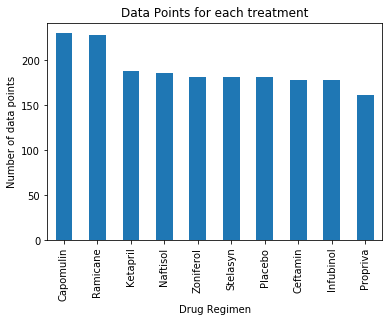

In [4]:
data_points_df.plot(kind='bar', title="Data Points for each treatment", legend = False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of data points')
plt.show()

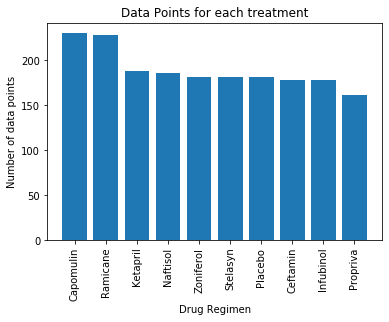

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drug_regimen, data_points)
plt.xticks(rotation = 90)
plt.title("Data Points for each treatment")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of data points')
plt.show()

## Pie plots

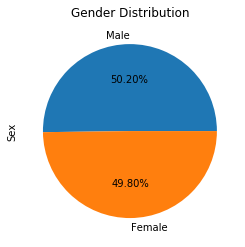

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = mouse_metadata['Sex'].value_counts()
gender_distribution_df = pd.DataFrame(gender_distribution)
gender_distribution_df.plot(y = 'Sex', kind='pie', title = 'Gender Distribution', legend = False, autopct='%.2f%%')
plt.show()

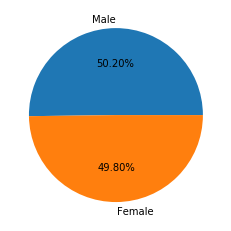

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_distribution_df.index
plt.pie(gender_distribution, labels = labels, autopct = '%.2f%%')
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_timepoint = pd.DataFrame(data.groupby(['Mouse ID'])['Timepoint'].max())
max_timepoint = max_timepoint.reset_index()

In [9]:
data_max_timepoint = pd.merge(max_timepoint, data, on=['Mouse ID', 'Timepoint'])
data_max_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [10]:
capomulin = data_max_timepoint.loc[data_max_timepoint['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
ramicane = data_max_timepoint.loc[data_max_timepoint['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
infubinol = data_max_timepoint.loc[data_max_timepoint['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
ceftamin = data_max_timepoint.loc[data_max_timepoint['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']

In [11]:
cap_quartiles = capomulin.quantile([.25,.5,.75])

cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

cap_outliers = capomulin.loc[(capomulin < cap_lower_bound)|(capomulin > cap_upper_bound)]
if len(cap_outliers)==0 :
    print("There are no potential outliers for Capomulin")
else:
    print(f"Potential outliers for Capomulin: {cap_outliers}")

There are no potential outliers for Capomulin


In [12]:
ram_quartiles = ramicane.quantile([.25,.5,.75])

ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

ram_outliers = ramicane.loc[(ramicane < ram_lower_bound)|(ramicane > ram_upper_bound)]
if len(ram_outliers)==0 :
    print("There are no potential outliers for Ramicane")
else:
    print(f"Potential outliers for Ramicane: {ram_outliers}")

There are no potential outliers for Ramicane


In [13]:
inf_quartiles = infubinol.quantile([.25,.5,.75])

inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

inf_outliers = infubinol.loc[(infubinol< inf_lower_bound)|(infubinol > inf_upper_bound)]
if len(inf_outliers)==0 :
    print("There are no potential outliers for Infubinol")
else:
    print(f"Potential outliers for Infubinol: {inf_outliers}")


Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [14]:
cef_quartiles = ceftamin.quantile([.25,.5,.75])

cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

cef_outliers = ceftamin.loc[(ceftamin < cef_lower_bound)|(ceftamin > cef_upper_bound)]
if len(cef_outliers)==0 :
    print("There are no potential outliers for Ceftamin")
else:
    print(f"Potential outliers for Ceftamin: {cef_outliers}")


There are no potential outliers for Ceftamin


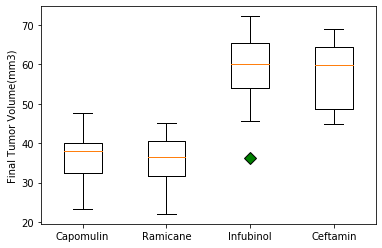

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor = 'green', marker='D', markersize = 8)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin],
            labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],
           flierprops = green_diamond)
plt.ylabel('Final Tumor Volume(mm3)')
plt.show()

## Line and scatter plots

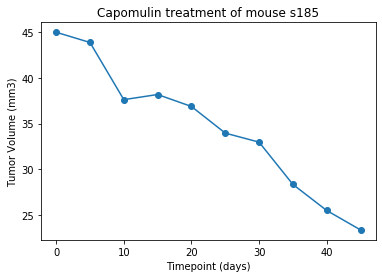

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = data.loc[data['Drug Regimen'] == 'Capomulin']
mouse_id = 's185'
one_mouse = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]

plt.plot(one_mouse['Timepoint'],one_mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.show()

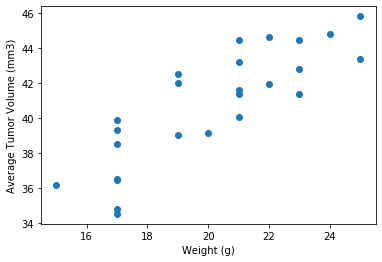

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grouped_mouse = capomulin_data.groupby('Mouse ID')
capomulin_mean = grouped_mouse.mean()
weight = capomulin_mean['Weight (g)']
tumor_vol = capomulin_mean['Tumor Volume (mm3)']
plt.scatter(weight, tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr, pval = st.pearsonr(weight, tumor_vol)
print(f"Correlation coefficient between mouse weight and the average tumor volume is: {round(corr,2)}")

Correlation coefficient between mouse weight and the average tumor volume is: 0.84


Regression Line Equation is: y = 0.95x + 21.55


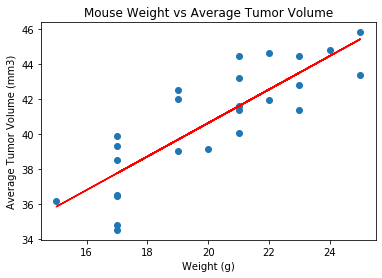

In [19]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, tumor_vol)
y_values = slope*weight + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"Regression Line Equation is: {line_eq}")
plt.scatter(weight, tumor_vol)
plt.plot(weight,y_values, 'r-')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()